# Group Work Submission 1: Measure Theory Concepts put in Practice 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix
from scipy.stats import bernoulli
from scipy.optimize import fsolve
from scipy.stats import norm
import pandas as pd
from matplotlib import colors
from pandas import DataFrame
%matplotlib inline

Build a binomial tree for stock price evolution. Specifically, set the upper movement of the
price (u) to an expression that will depend on the number on your group.

* Group Number = 25
* 𝑢 = (1.10 + Group Number/100) = 1.35

In [2]:
#  Our initial stock price
S0 = 100
#  Assumed up and down percentages
n = 25
u = (1.10 + n/100)
d = 1/u

In [3]:
#  Define the number of nodes
N = 6
#  Create some empty matrices to hold our stock prices.
stock_prices = np.zeros( (N, N) )
#  Put our initial price in the matrix
stock_prices[0,0] = S0

In [4]:
#  Fill out the remaining values
for i in range(1, N ):
    M = i + 1
    stock_prices[i, 0] = d * stock_prices[i-1, 0]
    for j in range(1, M ):
        stock_prices[i, j] = u * stock_prices[i - 1, j - 1]

In [5]:
stock_prices

array([[100.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [ 74.07407407, 135.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [ 54.8696845 , 100.        , 182.25      ,   0.        ,
          0.        ,   0.        ],
       [ 40.64421074,  74.07407407, 135.        , 246.0375    ,
          0.        ,   0.        ],
       [ 30.10682277,  54.8696845 , 100.        , 182.25      ,
        332.150625  ,   0.        ],
       [ 22.3013502 ,  40.64421074,  74.07407407, 135.        ,
        246.0375    , 448.40334375]])

Save data

In [6]:
#pd.DataFrame(stock_prices).to_csv("N6.csv")

Recalculate the tree for N=4,000, 𝑢 = (1.10 + Group Number/100)^4000 = 1.000075029

In [7]:
n1 = 25
u1 = (1.10 + n1/100)**(1/4000)
d1 = 1/u1
N4k = 4000
stock_prices4k = np.zeros( (N4k, N4k) )
stock_prices4k[0,0] = S0

In [8]:
#  Fill out the remaining values
for i in range(1, N4k ):
    M = i + 1
    stock_prices4k[i, 0] = d1 * stock_prices4k[i-1, 0]
    for j in range(1, M ):
        stock_prices4k[i, j] = u1 * stock_prices4k[i - 1, j - 1]

Removing Zeros

In [9]:
RZ = stock_prices4k[stock_prices4k != 0]
Pricelist = RZ.tolist()

Histogram Plot of the terminal prices, N = 4000.

Text(0.5, 0, 'Stock Prices')

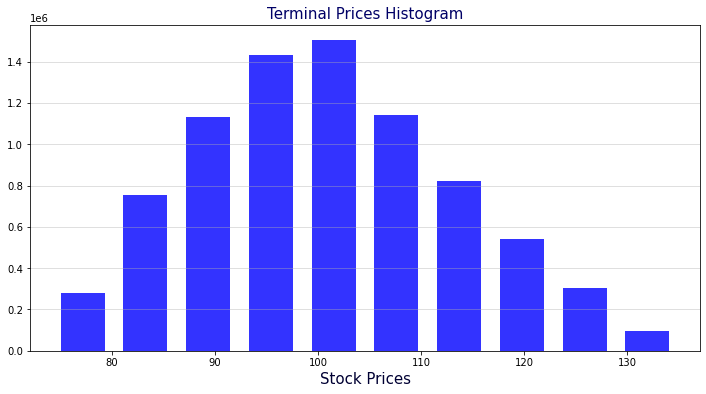

In [10]:
plt.figure(figsize=(12,6))
plt.hist(Pricelist, color="b", alpha=0.8, rwidth=0.7)
plt.grid(axis='y', alpha=0.5)
plt.title('Terminal Prices Histogram', fontsize=15, color="#000066")
plt.xlabel('Stock Prices', fontsize=15, color="#000033")

Save data

In [11]:
#pd.DataFrame(Pricelist).to_csv("Pricelist.csv")